In [1]:
%reload_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from alphabase.spectral_library.base import SpecLibBase
from alphadia import data, planning
from alphadia.workflow import manager, peptidecentric

/Users/georgwallmann/miniconda3/envs/alpha/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
performance_test_folder = (
    "/Users/georgwallmann/Documents/data/alphadia_performance_tests"
)

MODE = "astral"

if MODE == "astral":
    raw_files = [
        os.path.join(
            performance_test_folder,
            "raw_data/astral_lf_dia/20230815_OA1_SoSt_SA_Whisper40_ADIAMA_HeLa_5ng_8Th14ms_FAIMS-40_1900V_noLoopCount_01.raw",
        )
    ]
    output_location = os.path.join(performance_test_folder, "outputs/astral_lf_dia")
    speclib_path = os.path.join(
        performance_test_folder,
        "libraries/astral/48_fraction_hela_PaSk_orbitrap_ms2.hdf",
    )
elif MODE == "timstof":
    raw_files = [
        os.path.join(
            performance_test_folder,
            "raw_data/timstof_lf_diap/20230502_TIMS05_PaSk_SA_HeLa_21min_diaP_12scans_S2-A3_1_2089.d",
        )
    ]
    output_location = os.path.join(
        performance_test_folder, "outputs/timstof_lf_diaPASEF"
    )
    speclib_path = os.path.join(
        performance_test_folder,
        "libraries/timstof/21min_Evosep_HeLa_BR14_48fractions_diaPASEF_py_diAID_2_egs.hdf",
    )
else:
    raise ValueError("Unknown mode")

In [3]:
config = {
    "general": {
        "reuse_calibration": False,
        "reuse_quant": False,
        "thread_count": 10,
        "astral_ms1": False,
    },
    "search_initial": {
        "initial_num_candidates": 2,
    },
    "search_advanced": {
        "top_k_fragments_scoring": 12,
    },
    "search": {
        "target_num_candidates": 5,
        "target_ms1_tolerance": 4 if MODE == "astral" else 15,
        "target_ms2_tolerance": 7 if MODE == "astral" else 15,
        "target_rt_tolerance": 200,
    },
    "fdr": {"classifier": "legacy"},
}
plan = planning.Plan(output_location, raw_files, speclib_path, config=config)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/georgwallmann/Documents/data/performance_tests/outputs/astral_lf_dia/log.txt'

In [4]:
for raw_name, dia_path, speclib in plan.get_run_data():
    pass

0:00:16.002356 PROGRESS: Loading raw file 1/1: 20230815_OA1_SoSt_SA_Whisper40_ADIAMA_HeLa_5ng_8Th14ms_FAIMS-40_1900V_noLoopCount_01


22it [00:10,  2.17it/s]
0:00:27.312507 INFO: Determining DIA cycle
0:00:27.573428 INFO: Found cycle with start 0.00 min and length 76.
0:00:27.812023 INFO: Initializing CalibrationManager
0:00:27.813245 INFO: Loading calibration config
0:00:27.813761 INFO: Calibration config: [{'name': 'fragment', 'estimators': [{'name': 'mz', 'model': 'LOESSRegression', 'model_args': {'n_kernels': 2}, 'input_columns': ['mz_library'], 'target_columns': ['mz_observed'], 'output_columns': ['mz_calibrated'], 'transform_deviation': '1e6'}]}, {'name': 'precursor', 'estimators': [{'name': 'mz', 'model': 'LOESSRegression', 'model_args': {'n_kernels': 2}, 'input_columns': ['mz_library'], 'target_columns': ['mz_observed'], 'output_columns': ['mz_calibrated'], 'transform_deviation': '1e6'}, {'name': 'rt', 'model': 'LOESSRegression', 'model_args': {'n_kernels': 6, 'uniform': True}, 'input_columns': ['rt_library'], 'target_columns': ['rt_observed'], 'output_columns': ['rt_calibrated']}, {'name': 'mobility', 'model

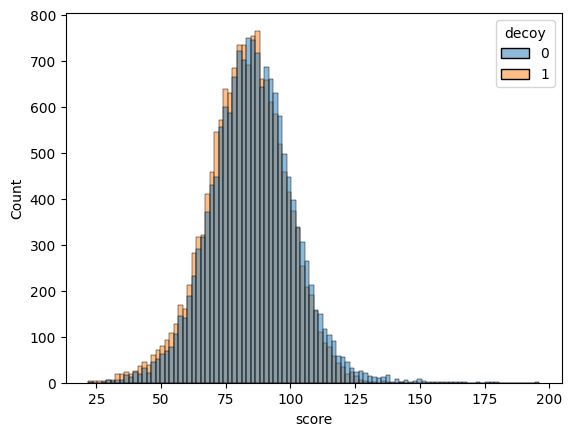

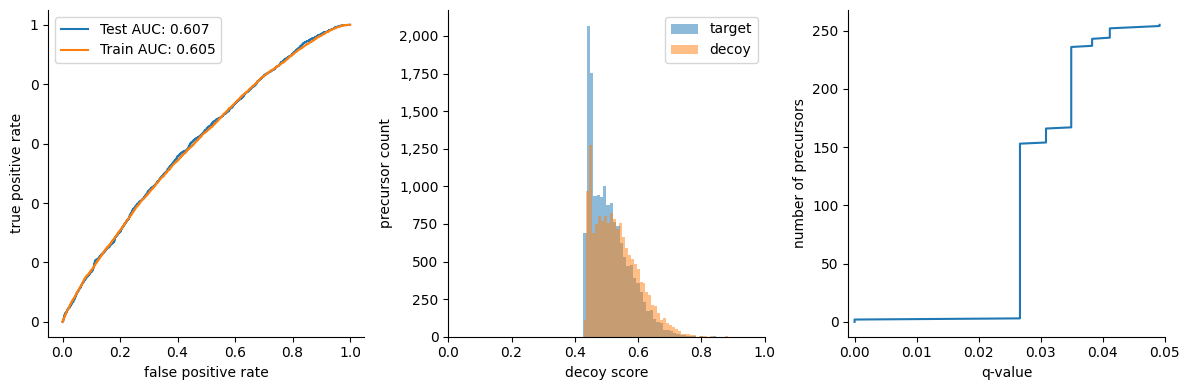

0:02:41.980079 PROGRESS: === checking if recalibration conditions were reached, target 200 precursors ===
0:02:41.981403 PROGRESS: ============================= Precursor FDR =============================
0:02:41.981882 PROGRESS: Total precursors accumulated: 495
0:02:41.982356 PROGRESS: Target precursors: 451 (91.11%)
0:02:41.982821 PROGRESS: Decoy precursors: 44 (8.89%)
0:02:41.983234 PROGRESS: 
0:02:41.983653 PROGRESS: Precursor Summary:
0:02:41.984872 PROGRESS: Channel   0:	 0.05 FDR:   244; 0.01 FDR:     3; 0.001 FDR:     3
0:02:41.985282 PROGRESS: 
0:02:41.985675 PROGRESS: Protein Summary:
0:02:41.986936 PROGRESS: Channel   0:	 0.05 FDR:   229; 0.01 FDR:     3; 0.001 FDR:     3
0:02:41.987350 PROGRESS: =========================================================================
0:02:41.988122 PROGRESS: === Epoch 0, step 1, extracting elution groups 8000 to 24000 ===
0:02:42.000168 PROGRESS: Extracting batch of 31741 precursors
0:02:42.007825 INFO: Duty cycle consists of 76 frames, 1

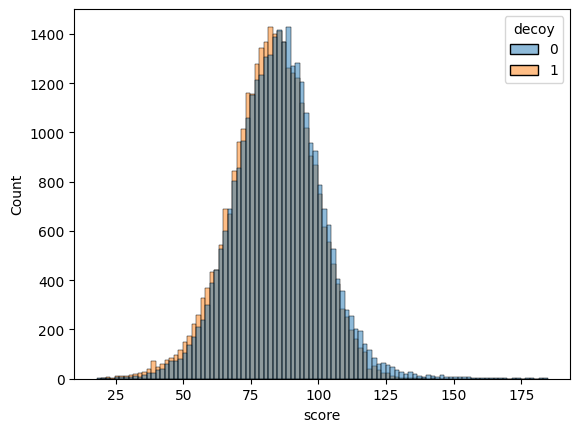

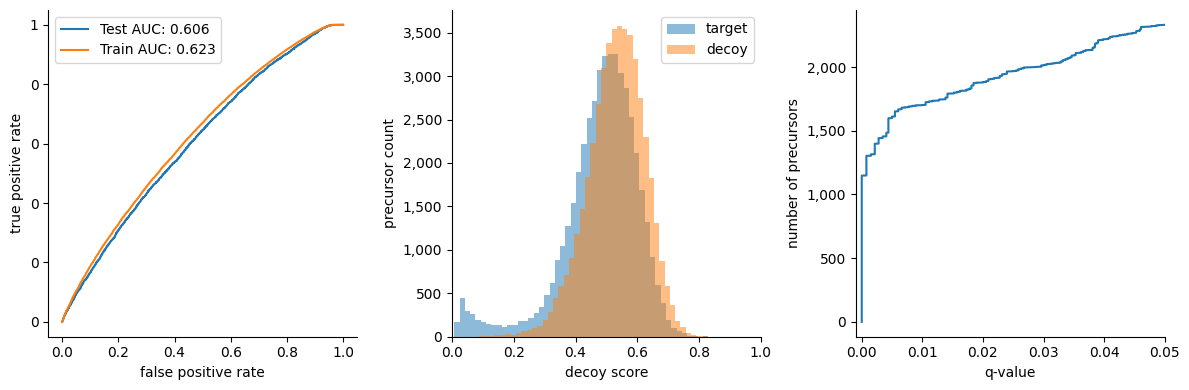

0:04:16.482477 PROGRESS: === checking if recalibration conditions were reached, target 200 precursors ===
0:04:16.485252 PROGRESS: ============================= Precursor FDR =============================
0:04:16.485792 PROGRESS: Total precursors accumulated: 2,815
0:04:16.486247 PROGRESS: Target precursors: 2,581 (91.69%)
0:04:16.486660 PROGRESS: Decoy precursors: 234 (8.31%)
0:04:16.487033 PROGRESS: 
0:04:16.487449 PROGRESS: Precursor Summary:
0:04:16.489280 PROGRESS: Channel   0:	 0.05 FDR: 2,221; 0.01 FDR: 1,685; 0.001 FDR: 1,303
0:04:16.489745 PROGRESS: 
0:04:16.490144 PROGRESS: Protein Summary:
0:04:16.492388 PROGRESS: Channel   0:	 0.05 FDR: 1,568; 0.01 FDR: 1,216; 0.001 FDR:   966
0:04:16.492841 PROGRESS: =========================================================================
0:04:16.495148 INFO: calibration group: precursor, fitting mz estimator 


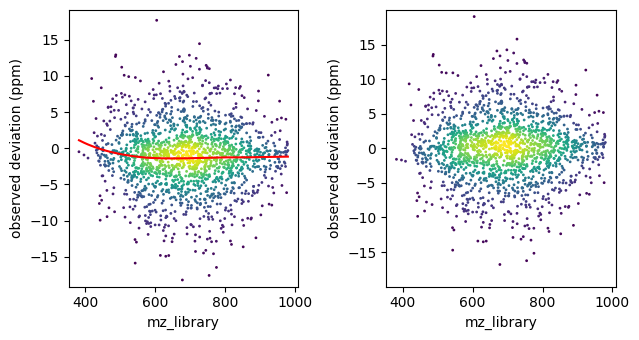

0:04:16.668209 INFO: calibration group: precursor, fitting rt estimator 


Too few datapoints per kernel. Uniform kernels will be replaced by density kernels.


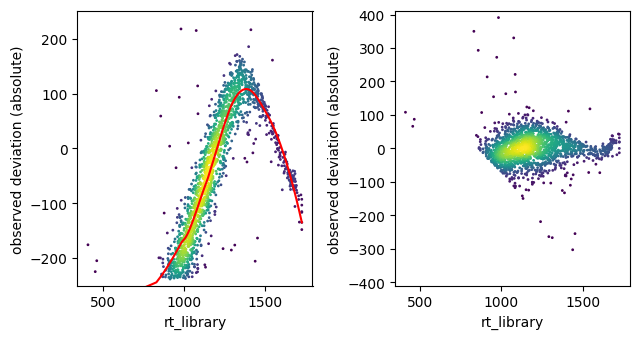

0:04:16.904282 INFO: calibration group: fragment, fitting mz estimator 


fragments_df_filtered: 5000


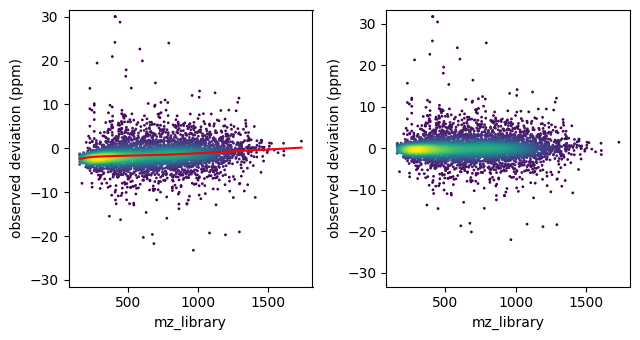

0:04:17.609511 INFO: === checking if epoch conditions were reached ===
0:04:17.610104 INFO: ❌ ms1_error      : 9.4518 > 4
0:04:17.610617 INFO: ✅ ms2_error      : 7.0000 <= 7
0:04:17.611292 INFO: ✅ rt_error       : 200.0000 <= 200
0:04:17.611791 INFO: ❌ current_epoch  : 0 < 3
0:04:17.612232 INFO: ==============================================
0:04:17.618592 INFO: calibration group: precursor, predicting mz
0:04:17.658679 INFO: calibration group: precursor, predicting rt


score cutoff 64.51473695373535


0:04:17.864312 INFO: calibration group: fragment, predicting mz
0:04:18.455097 PROGRESS: === Epoch 1, step 0, extracting elution groups 0 to 8000 ===
0:04:18.467785 PROGRESS: Extracting batch of 15889 precursors
0:04:18.477445 INFO: Duty cycle consists of 76 frames, 1.34 seconds cycle time
0:04:18.479834 INFO: Duty cycle consists of 1 scans, 0.00000 1/K_0 resolution
0:04:18.483818 INFO: FWHM in RT is 4.52 seconds, sigma is 0.72
0:04:18.485721 INFO: FWHM in mobility is 0.000 1/K_0, sigma is 1.00
0:04:18.489797 INFO: Starting candidate selection
100%|██████████| 15889/15889 [00:35<00:00, 444.37it/s]
0:04:55.426791 INFO: Finished candidate selection
0:04:55.602613 INFO: Starting candidate scoring
100%|██████████| 78129/78129 [00:06<00:00, 12367.90it/s]
0:05:02.058418 INFO: Finished candidate processing
0:05:02.058819 INFO: Collecting candidate features
0:05:02.203641 WARNING: intensity_correlation has 24 NaNs ( 0.03 % out of 77549)
0:05:02.209734 INFO: Collecting fragment features
0:05:02

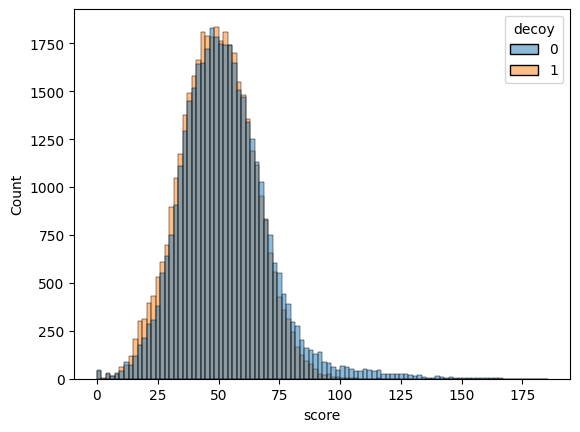

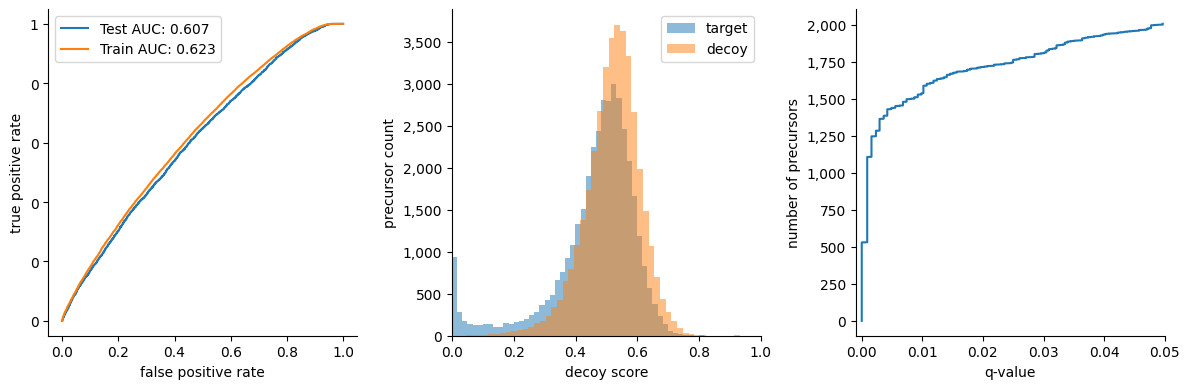

0:05:03.780539 PROGRESS: === checking if recalibration conditions were reached, target 400 precursors ===
0:05:03.782063 PROGRESS: ============================= Precursor FDR =============================
0:05:03.782620 PROGRESS: Total precursors accumulated: 2,242
0:05:03.783062 PROGRESS: Target precursors: 2,086 (93.04%)
0:05:03.783550 PROGRESS: Decoy precursors: 156 (6.96%)
0:05:03.783936 PROGRESS: 
0:05:03.784314 PROGRESS: Precursor Summary:
0:05:03.786098 PROGRESS: Channel   0:	 0.05 FDR: 1,912; 0.01 FDR: 1,523; 0.001 FDR: 1,107
0:05:03.786526 PROGRESS: 
0:05:03.786920 PROGRESS: Protein Summary:
0:05:03.789052 PROGRESS: Channel   0:	 0.05 FDR: 1,509; 0.01 FDR: 1,214; 0.001 FDR:   901
0:05:03.789587 PROGRESS: =========================================================================
0:05:03.791660 INFO: calibration group: precursor, fitting mz estimator 


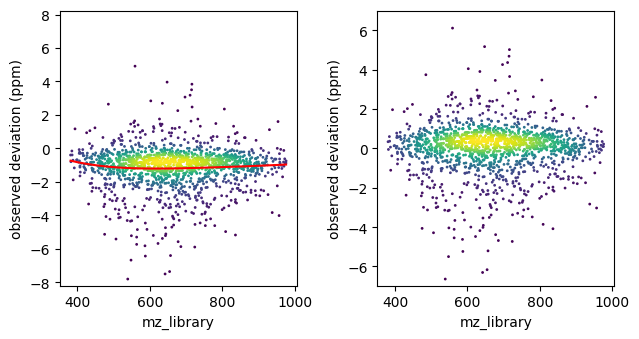

0:05:04.030636 INFO: calibration group: precursor, fitting rt estimator 


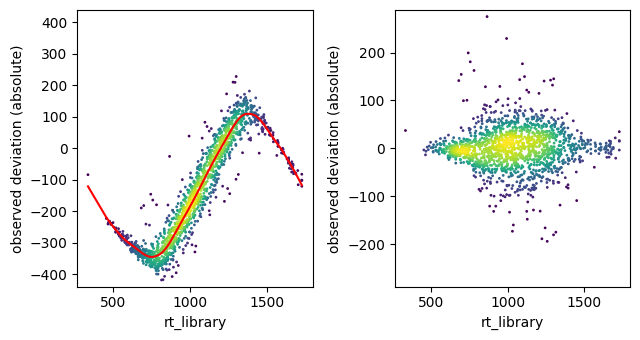

0:05:04.328374 INFO: calibration group: fragment, fitting mz estimator 


fragments_df_filtered: 5000


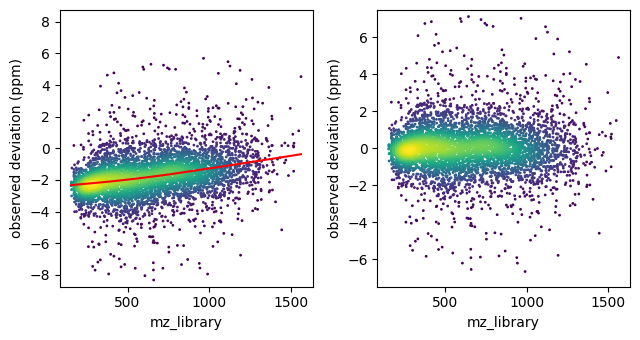

0:05:05.094794 INFO: === checking if epoch conditions were reached ===
0:05:05.095557 INFO: ✅ ms1_error      : 4.0000 <= 4
0:05:05.096164 INFO: ✅ ms2_error      : 7.0000 <= 7
0:05:05.096641 INFO: ✅ rt_error       : 200.0000 <= 200
0:05:05.097165 INFO: ❌ current_epoch  : 1 < 3
0:05:05.097407 INFO: ==============================================
0:05:05.103584 INFO: calibration group: precursor, predicting mz
0:05:05.144464 INFO: calibration group: precursor, predicting rt


score cutoff 38.549350936889645


0:05:05.297918 INFO: calibration group: fragment, predicting mz
0:05:05.957591 PROGRESS: === Epoch 2, step 0, extracting elution groups 0 to 8000 ===
0:05:05.971427 PROGRESS: Extracting batch of 15884 precursors
0:05:05.976484 INFO: Duty cycle consists of 76 frames, 1.34 seconds cycle time
0:05:05.980320 INFO: Duty cycle consists of 1 scans, 0.00000 1/K_0 resolution
0:05:05.982533 INFO: FWHM in RT is 3.68 seconds, sigma is 0.59
0:05:05.984650 INFO: FWHM in mobility is 0.000 1/K_0, sigma is 1.00
0:05:05.985686 INFO: Starting candidate selection
100%|██████████| 15884/15884 [00:33<00:00, 475.36it/s]
0:05:40.744233 INFO: Finished candidate selection
0:05:40.924809 INFO: Starting candidate scoring
100%|██████████| 78100/78100 [00:06<00:00, 12878.38it/s]
0:05:47.141820 INFO: Finished candidate processing
0:05:47.142257 INFO: Collecting candidate features
0:05:47.287265 WARNING: intensity_correlation has 27 NaNs ( 0.03 % out of 77757)
0:05:47.294145 INFO: Collecting fragment features
0:05:47

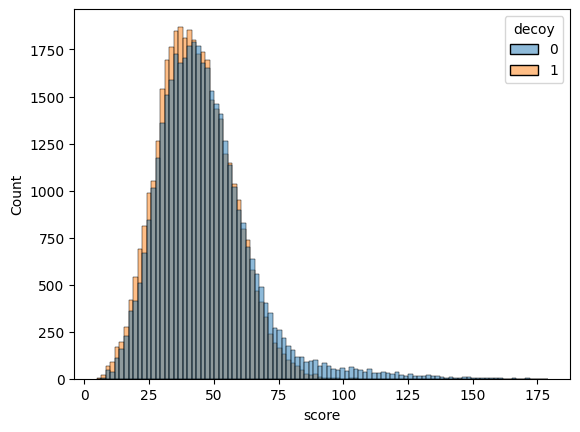

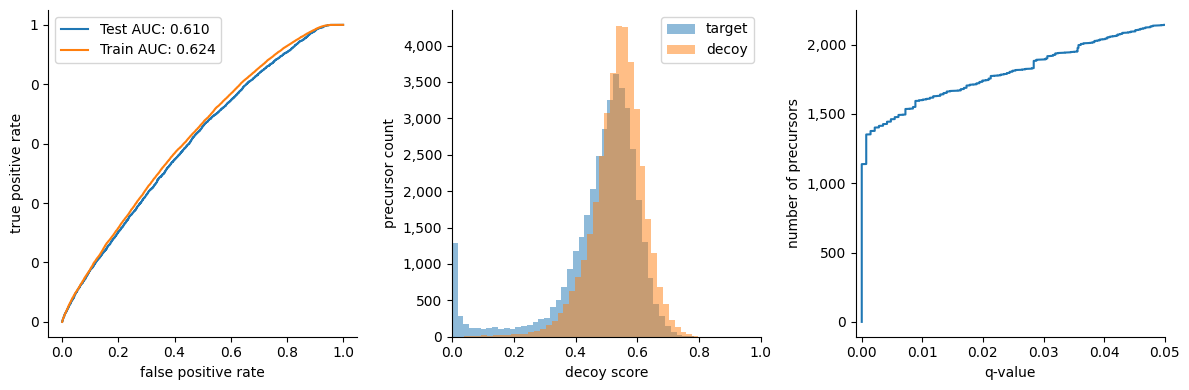

0:05:49.088844 PROGRESS: === checking if recalibration conditions were reached, target 600 precursors ===
0:05:49.090380 PROGRESS: ============================= Precursor FDR =============================
0:05:49.090905 PROGRESS: Total precursors accumulated: 2,412
0:05:49.091465 PROGRESS: Target precursors: 2,253 (93.41%)
0:05:49.091986 PROGRESS: Decoy precursors: 159 (6.59%)
0:05:49.092563 PROGRESS: 
0:05:49.093050 PROGRESS: Precursor Summary:
0:05:49.094978 PROGRESS: Channel   0:	 0.05 FDR: 2,042; 0.01 FDR: 1,585; 0.001 FDR: 1,352
0:05:49.095507 PROGRESS: 
0:05:49.095935 PROGRESS: Protein Summary:
0:05:49.098412 PROGRESS: Channel   0:	 0.05 FDR: 1,576; 0.01 FDR: 1,245; 0.001 FDR: 1,083
0:05:49.098886 PROGRESS: =========================================================================
0:05:49.100807 INFO: calibration group: precursor, fitting mz estimator 


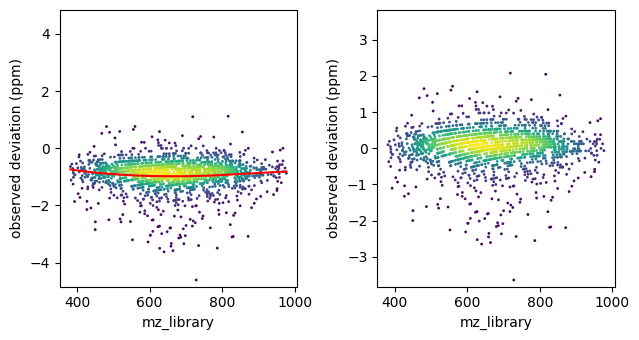

0:05:49.264791 INFO: calibration group: precursor, fitting rt estimator 


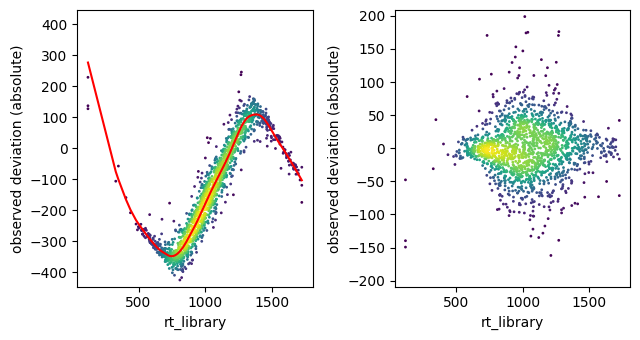

0:05:49.478131 INFO: calibration group: fragment, fitting mz estimator 


fragments_df_filtered: 5000


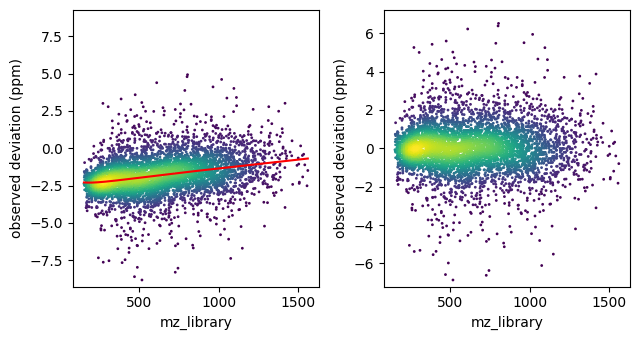

0:05:50.065136 INFO: === checking if epoch conditions were reached ===
0:05:50.065667 INFO: ✅ ms1_error      : 4.0000 <= 4
0:05:50.066009 INFO: ✅ ms2_error      : 7.0000 <= 7
0:05:50.066639 INFO: ✅ rt_error       : 200.0000 <= 200
0:05:50.067209 INFO: ✅ current_epoch  : 2 >= 3
0:05:50.067607 INFO: ==============================================


score cutoff 39.95770706176758


In [5]:
workflow = peptidecentric.PeptideCentricWorkflow(
    raw_name,
    plan.config,
)
workflow.load(dia_path, speclib)
workflow.calibration()

In [6]:
workflow.extraction()

0:05:50.105573 INFO: calibration group: precursor, predicting mz
0:05:50.148102 INFO: calibration group: precursor, predicting rt
0:05:50.344731 INFO: calibration group: fragment, predicting mz
0:05:50.946516 PROGRESS: Extracting batch of 438986 precursors
0:05:51.029319 INFO: Duty cycle consists of 76 frames, 1.34 seconds cycle time
0:05:51.032380 INFO: Duty cycle consists of 1 scans, 0.00000 1/K_0 resolution
0:05:51.034180 INFO: FWHM in RT is 3.58 seconds, sigma is 0.57
0:05:51.034839 INFO: FWHM in mobility is 0.000 1/K_0, sigma is 1.00
0:05:51.037023 INFO: Starting candidate selection
 22%|██▏       | 97479/438986 [03:33<12:26, 457.44it/s]


KeyboardInterrupt: 

In [ ]:
test_df = workflow.spectral_library.precursor_df.sample(1000)

In [ ]:
from alphadia import hybridselection

config = hybridselection.HybridCandidateConfig()
config.update(workflow.config["selection_config"])
config.update(
    {
        "rt_tolerance": workflow.com.rt_error,
        "mobility_tolerance": workflow.com.mobility_error,
        "candidate_count": workflow.com.num_candidates,
        "precursor_mz_tolerance": workflow.com.ms1_error,
        "fragment_mz_tolerance": workflow.com.ms2_error,
        "exclude_shared_ions": workflow.config["search"]["exclude_shared_ions"],
    }
)

extraction = hybridselection.HybridCandidateSelection(
    workflow.dia_data.jitclass(),
    test_df,
    workflow.spectral_library.fragment_df,
    config.jitclass(),
    rt_column=f"rt_{workflow.com.column_type}",
    mobility_column=f"mobility_{workflow.com.column_type}",
    precursor_mz_column=f"mz_{workflow.com.column_type}",
    fragment_mz_column=f"mz_{workflow.com.column_type}",
    fwhm_rt=workflow.optimization_manager.fwhm_rt,
    fwhm_mobility=workflow.optimization_manager.fwhm_mobility,
)
candidates_df = extraction(thread_count=workflow.config["general"]["thread_count"])

In [ ]:
from alphadia import plexscoring

config = plexscoring.CandidateConfig()
config.update(workflow.config["scoring_config"])
config.update(
    {
        "precursor_mz_tolerance": workflow.com.ms1_error,
        "fragment_mz_tolerance": workflow.com.ms2_error,
        "exclude_shared_ions": workflow.config["search"]["exclude_shared_ions"],
    }
)

candidate_scoring = plexscoring.CandidateScoring(
    workflow.dia_data.jitclass(),
    workflow.spectral_library._precursor_df,
    workflow.spectral_library._fragment_df,
    config=config,
    rt_column=f"rt_{workflow.com.column_type}",
    mobility_column=f"mobility_{workflow.com.column_type}",
    precursor_mz_column=f"mz_{workflow.com.column_type}",
    fragment_mz_column=f"mz_{workflow.com.column_type}",
)

features_df, fragments_df = candidate_scoring(
    candidates_df,
    thread_count=workflow.config["general"]["thread_count"],
)